In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0


In [ ]:
import mne
from mne import create_info, find_events, Epochs, EpochsArray, set_eeg_reference
from mne_connectivity import spectral_connectivity_time
from mne.time_frequency import tfr_morlet
import numpy as np

In [ ]:
data_array1 = np.loadtxt(open('ilya_with_biofeedback.data', "rb"), skiprows=0).T
data_array2 = np.loadtxt(open('ilya_without_biofeedback.data', "rb"), skiprows=0).T

data_array1 = data_array1[0:3, :]
data_array2 = data_array2[0:3, :]

sfreq=500
ch_names = ['Fp1', 'Fp2', 'ECG']
ch_types = ['eeg']*2 + ['ecg']

In [ ]:
data_array1.shape

(3, 18500)

In [ ]:
data_array2.shape

(3, 8000)

In [ ]:
info = mne.create_info(ch_names,sfreq, ch_types)
info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"2 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,ECG
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [ ]:
raw1 = mne.io.RawArray(data_array1, info)
raw2 = mne.io.RawArray(data_array2, info)

Creating RawArray with float64 data, n_channels=3, n_times=18500
    Range : 0 ... 18499 =      0.000 ...    36.998 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=8000
    Range : 0 ... 7999 =      0.000 ...    15.998 secs
Ready.


In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')
raw1.set_montage(montage)
raw2.set_montage(montage)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,5 points
Good channels,"2 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,ECG
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [ ]:
raw1.filter(2, 45)
raw2.filter(2, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (1.650 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 4

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,5 points
Good channels,"2 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,ECG
Sampling frequency,500.00 Hz
Highpass,2.00 Hz
Lowpass,45.00 Hz


Using matplotlib as 2D backend.


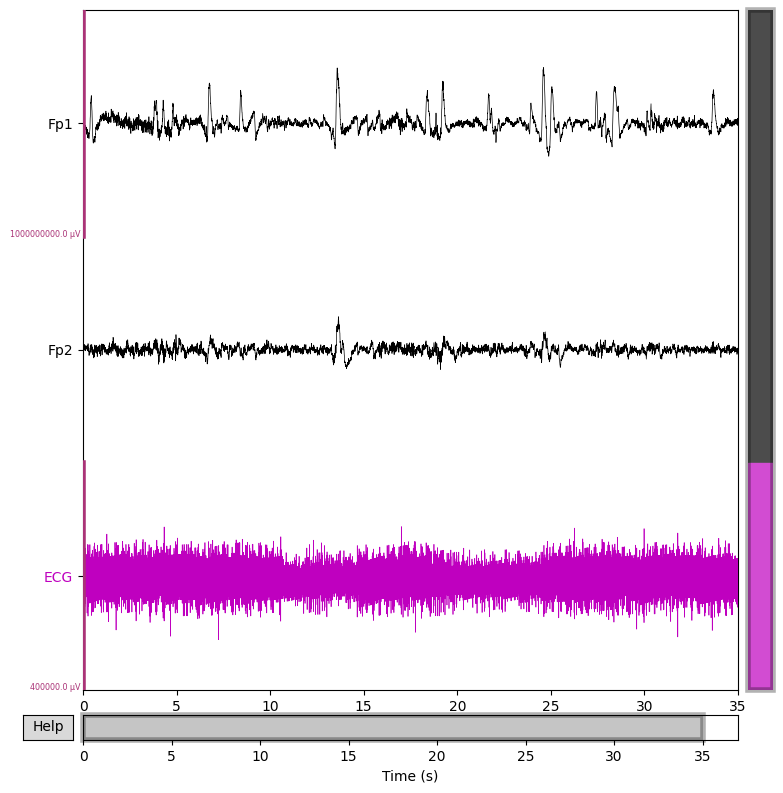

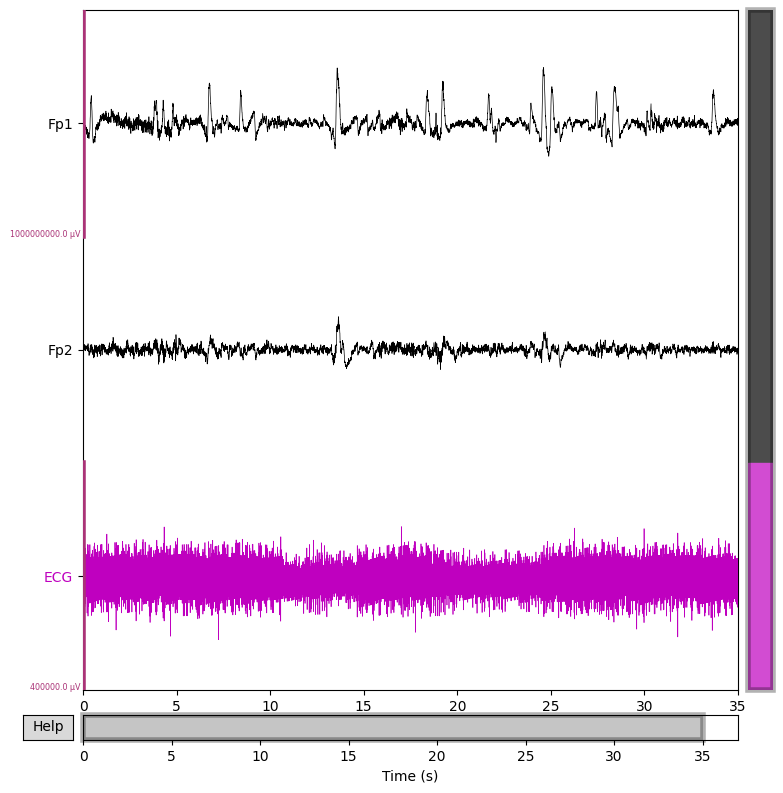

In [ ]:
raw1.plot(scalings=dict(eeg=500, ecg=0.2), duration=35)

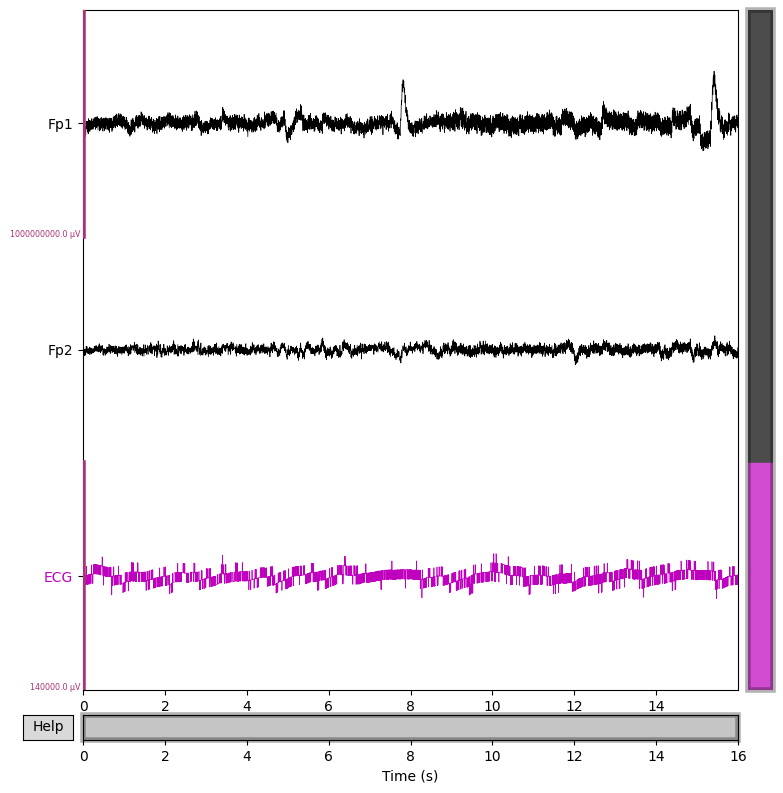

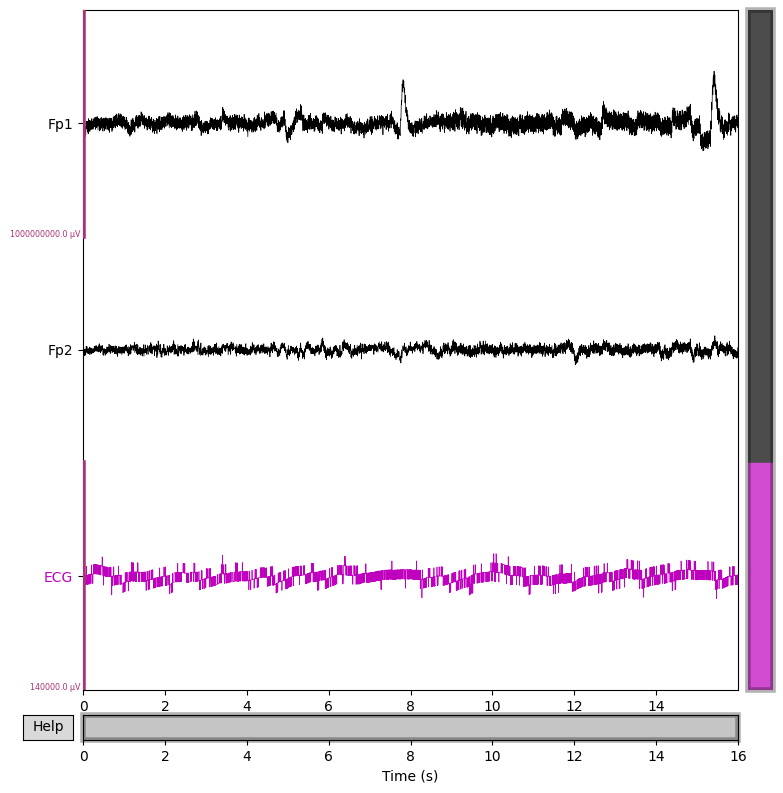

In [ ]:
raw2.plot(scalings=dict(eeg=500, ecg=0.07), duration=16)

Effective window size : 4.096 (s)


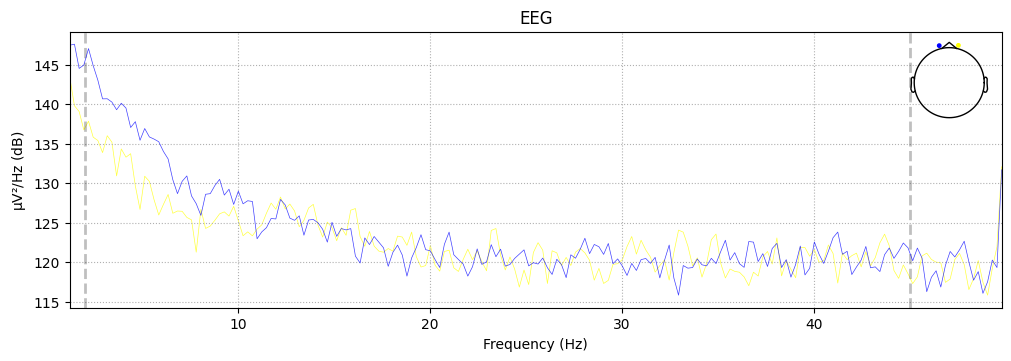

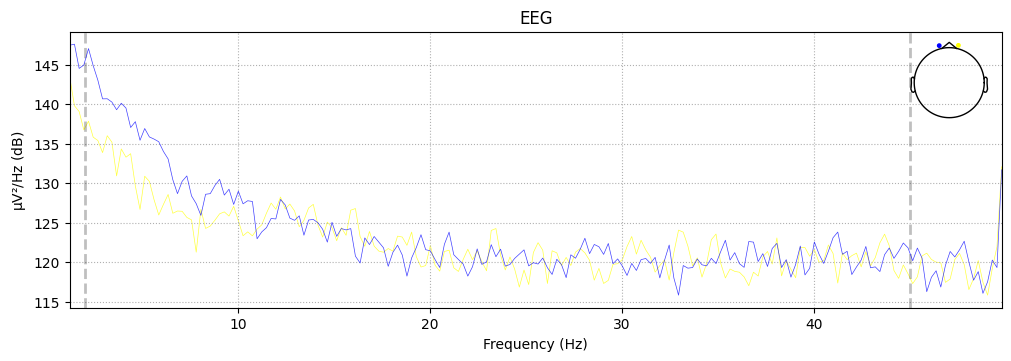

In [ ]:
raw1.compute_psd(fmin=1, fmax=50).plot()

Effective window size : 4.096 (s)


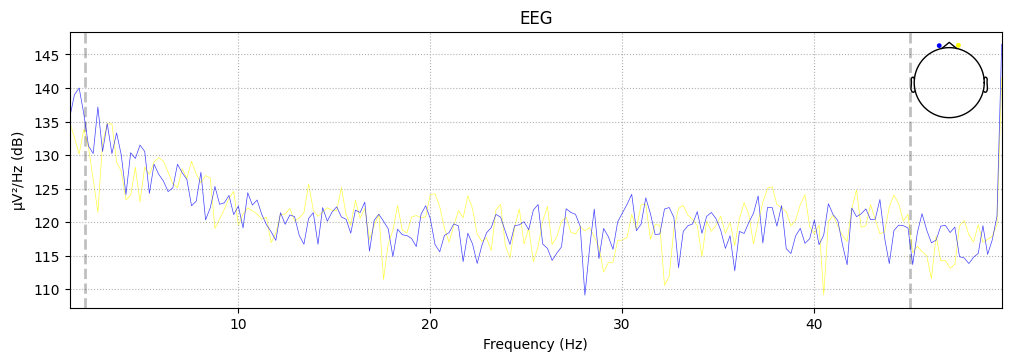

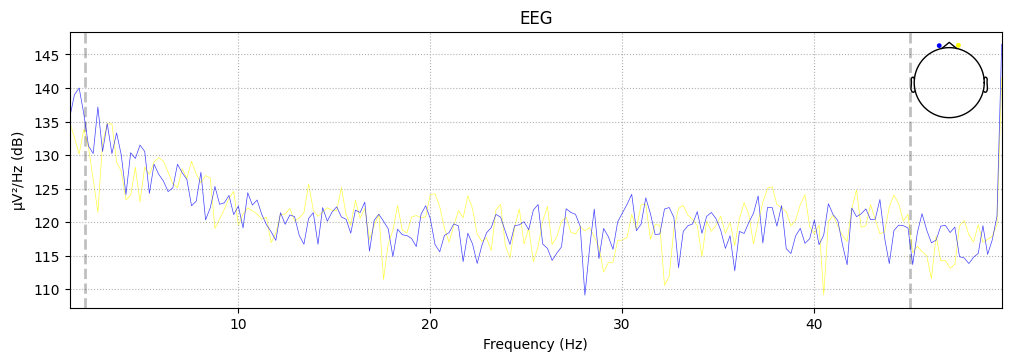

In [ ]:
raw2.compute_psd(fmin=1, fmax=50).plot()

Effective window size : 4.096 (s)


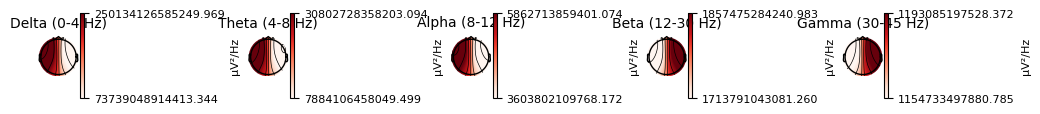

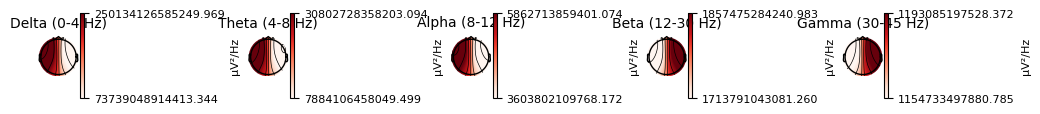

In [ ]:
raw1.compute_psd().plot_topomap()

Effective window size : 4.096 (s)


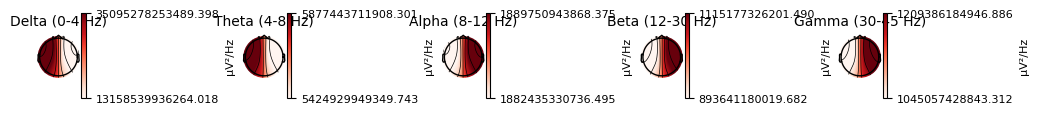

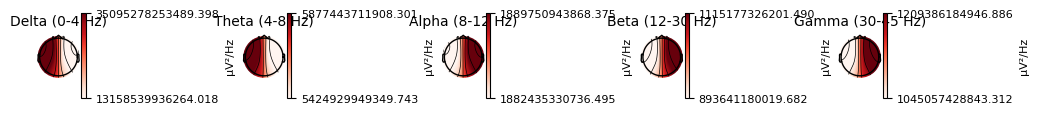

In [ ]:
raw2.compute_psd().plot_topomap()